# MNIST Classification Task

In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import keras
from keras.layers import Dense
from keras.models import Sequential
import tensorflow as tf

# Obtaining the dataset

In [2]:
from keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
assert X_train.shape == (60000, 28, 28) #assert that there are 60000 images, each 28*28 pixels
assert X_test.shape == (10000, 28, 28)  #assert that there are 10000 images, each 28*28 pixels
assert y_train.shape == (60000,)        #assert that there are 60000 respective output values
assert y_test.shape == (10000,)         #assert that there are 10000 respective output values

# Flattening the input to get feature vector

In [4]:
image_size = 28 * 28
X_train = X_train.reshape(X_train.shape[0], image_size)
X_test = X_test.reshape(X_test.shape[0], image_size)
print("X train shape:", X_train.shape)
print("X test shape:", X_test.shape)

X train shape: (60000, 784)
X test shape: (10000, 784)


In [5]:
# print(np.unique(y_train))

In [6]:
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)


In [7]:
# y_train

# Building the FNN using keras package

In [8]:
model = Sequential()

model.add(Dense(units = 32, activation = 'sigmoid', input_shape = (image_size,))) #Hidden Layer
model.add(Dense(units = num_classes, activation = 'softmax')) #output layer
model.compile(optimizer = "sgd", loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


# Fitting the model

In [9]:
history = model.fit(X_train, y_train, batch_size = 128, epochs = 100, validation_data=(X_test, y_test),verbose = False)

# Plotting Training Loss and Test Loss for iterations

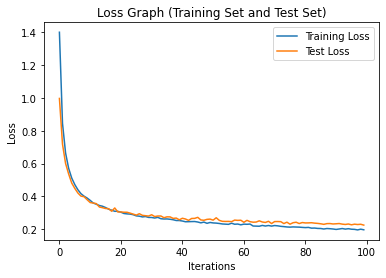

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend(['Training Loss','Test Loss'])
plt.title("Loss Graph (Training Set and Test Set)")
plt.show()

# Overall accuracy and loss values

In [11]:
loss_train, accuracy_train = model.evaluate(X_train, y_train, verbose = False)
loss_test, accuracy_test = model.evaluate(X_test, y_test, verbose = False)

print(f"Training set\n Loss = {round(loss_train,4)}\t Accuracy = {round(accuracy_train,4)}\n")
print(f"Test set\n Loss = {round(loss_test,4)}\t Accuracy = {round(accuracy_test,4)}\n")

Training set
 Loss = 0.1993	 Accuracy = 0.9416

Test set
 Loss = 0.2256	 Accuracy = 0.9365



# References

Code references:<br>
1. https://colab.research.google.com/drive/1U0sRZdxVUn8LbQN9KidMaomKt2MPJ2-o#forceEdit=true&sandboxMode=true&scrollTo=XaR6ncOmHNNw
2. https://medium.com/tebs-lab/how-to-classify-mnist-digits-with-different-neural-network-architectures-39c75a0f03e3

Other resources: <br>
https://keras.io/api/datasets/mnist/#load_data-function